## MCMC
- ref1 : https://github.com/Joseph94m/MCMC/blob/master/MCMC.ipynb
- ref2 : https://angeloyeo.github.io/2020/09/17/MCMC.html

(3238,) (3238,)
1785.042


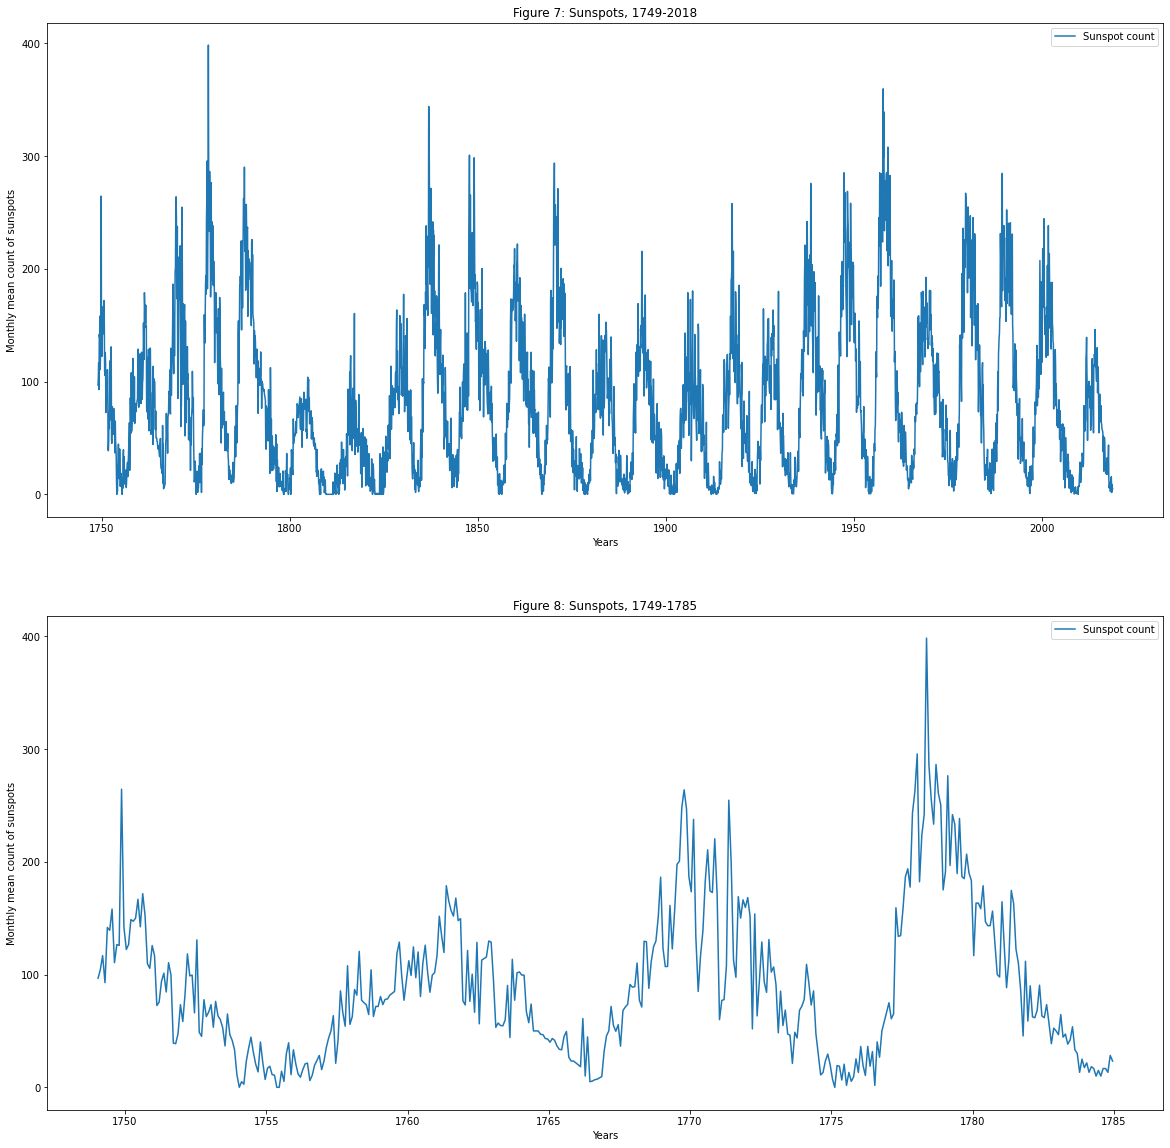

In [1]:
import numpy as np
import matplotlib.pyplot as plt

sunspots = np.loadtxt('data/SN_m_tot_V2.0.csv', delimiter=';')

#years is the third column
years = sunspots[:,2]

#activity is the 4th column
activity = sunspots[:,3] + 0.1

print(years.shape,activity.shape)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(2,1,1)

ax.plot(years, activity, label="Sunspot count")
ax.set_yticks(np.arange(0,500,100))
ax.set_xlabel("Years")
ax.set_ylabel("Monthly mean count of sunspots")
ax.set_title("Figure 7: Sunspots, 1749-2018")
ax.legend()


ax = fig.add_subplot(2,1,2)
print(years[432])
ax.plot(years[:432], activity[:432], label="Sunspot count")
ax.set_yticks(np.arange(0,500,100))
ax.set_xlabel("Years")
ax.set_ylabel("Monthly mean count of sunspots")
ax.set_title("Figure 8: Sunspots, 1749-1785")
ax.legend()

Text(0.5, 1.0, 'Figure 9: Histogram showing the frequency of sunspot counts over 270 years (1749-2018)')

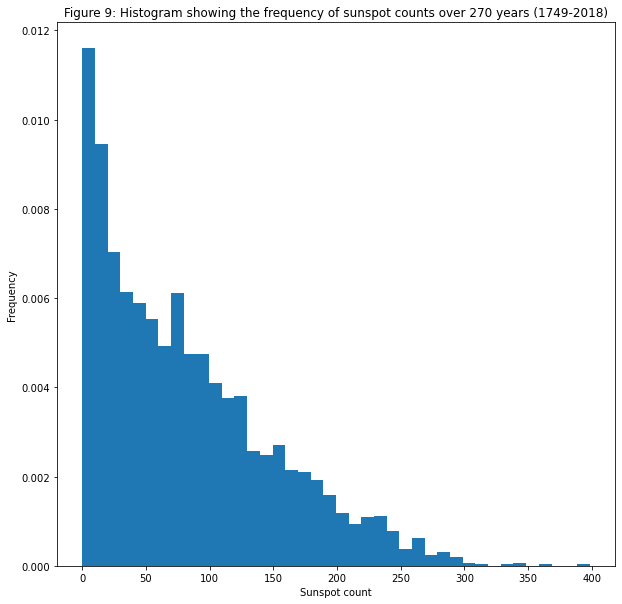

In [2]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist(activity, bins=40, density=True)
ax.set_xlabel("Sunspot count")
ax.set_ylabel("Frequency")
ax.set_title("Figure 9: Histogram showing the frequency of sunspot counts over 270 years (1749-2018)")

In [3]:
import math

accepted = []
rejected = []

# alpha, beta
proposal_dist = lambda alpha, beta: np.random.normal(loc=[alpha, beta], scale=[0.05,5], size=(2,))
get_lik = lambda data, alpha, beta : np.sum((alpha-1)*np.log(data) - (1/beta)*data - alpha*np.log(beta) - np.log(math.gamma(alpha)))


alpha_old, beta_old = 4, 10

for _ in range(50000):
    
    # 2. next point recommendation
    alpha_new, beta_new = proposal_dist(alpha_old, beta_old)
    
    prior_new = 1 if alpha_new > 0 or beta_new > 0 else 0
    prior_old = 1 if alpha_old > 0 or beta_old > 0 else 0
    
    new_lik = get_lik(activity, alpha_new, beta_new)
    lik = get_lik(activity, alpha_old, beta_old)
    
    x_new = new_lik + np.log(prior_new)
    x_old = lik + np.log(prior_old)
    
    critera = x_new > x_old
    
    
    if critera == True:
        alpha_old, beta_old = alpha_new, beta_new
        accepted.append((alpha_new, beta_new))
        
    else:

        # 패자 부활전
        u = np.random.uniform(0, 1)
        
        if np.exp(x_new - x_old) > u:
            alpha_old, beta_old = alpha_new, beta_new
            accepted.append((alpha_new, beta_new))

        else:
            rejected.append((alpha_new, beta_new))
            continue

Text(0.5, 1.0, 'Figure 12: MCMC sampling for $a$ and $b$ with Metropolis-Hastings. Last 50 samples are shown.')

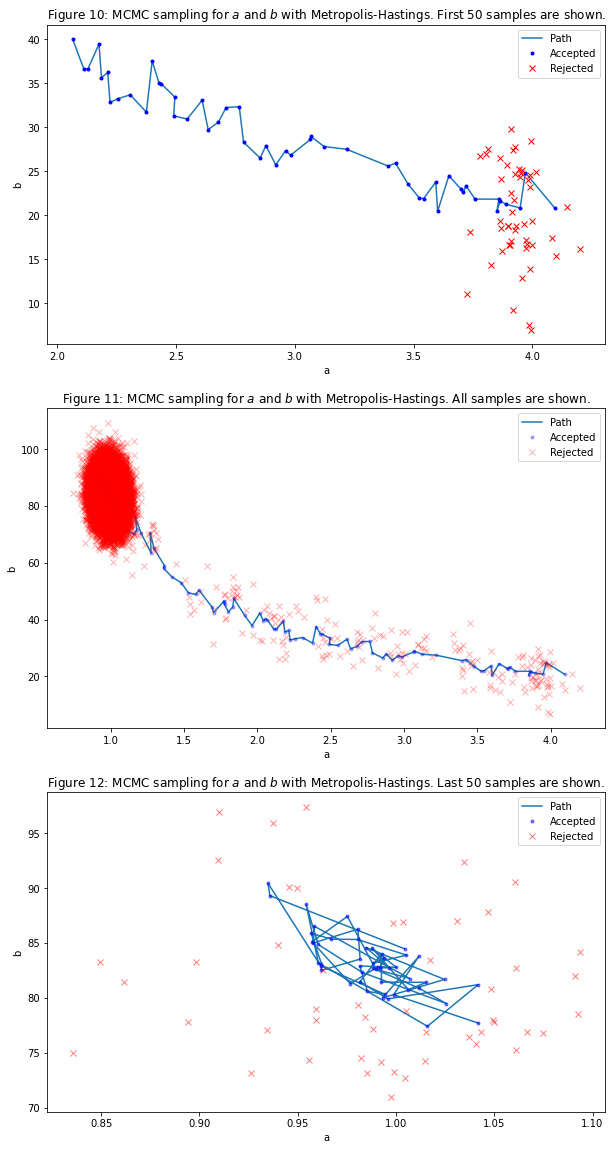

In [4]:
accepted , rejected = np.array(accepted), np.array(rejected)

fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(3,1,1)
ax.plot(accepted[:50,0], accepted[:50,1], label="Path")
ax.plot(accepted[:50,0], accepted[:50,1], 'b.', label='Accepted')
ax.plot(rejected[:50,0], rejected[:50,1], 'rx', label='Rejected')
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.legend()
ax.set_title("Figure 10: MCMC sampling for $a$ and $b$ with Metropolis-Hastings. First 50 samples are shown.")  


ax = fig.add_subplot(3,1,2)
ax.plot(accepted[:,0], accepted[:,1], label="Path")
ax.plot(accepted[:,0], accepted[:,1], 'b.', label='Accepted',alpha=0.3)
ax.plot(rejected[:,0], rejected[:,1], 'rx', label='Rejected',alpha=0.3)
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.legend()
ax.set_title("Figure 11: MCMC sampling for $a$ and $b$ with Metropolis-Hastings. All samples are shown.") 

to_show=50
ax = fig.add_subplot(3,1,3)
ax.plot(accepted[-to_show:,0], accepted[-to_show:,1], label="Path")
ax.plot(accepted[-to_show:,0], accepted[-to_show:,1], 'b.', label='Accepted',alpha=0.5)
ax.plot(rejected[-to_show:,0], rejected[-to_show:,1], 'rx', label='Rejected',alpha=0.5)
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.legend()
ax.set_title("Figure 12: MCMC sampling for $a$ and $b$ with Metropolis-Hastings. Last 50 samples are shown.")